In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
#Importar data
df = pd.read_csv("data.csv")
print(df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  ...  Unnamed: 991  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0  ...           NaN   
1  179    0.13  202.27    23.27   4.1          1.0  1.0  ...           NaN   
2   68    0.12   76.16     8.16   4.4          1.0  1.0  ...           NaN   
3  175    0.12  196.00    21.00   3.8          1.0  1.0  ...           NaN   
4   38    0.09   41.42     3.42   4.1          1.0  1.0  ...           NaN   

   Unnamed: 992  Unnamed: 993  Unnamed: 994 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15544\1757755306.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [3]:
# Seleccionar todas las filas y las columnas hasta 'Sensitive' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

In [4]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv("data.csv")

# Seleccionar todas las filas y las columnas hasta 'Sensitive' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)

            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15544\1499231548.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [5]:
print(new_df)

            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

In [6]:
# Revisamos los tipos de variables que se encuentran en el data frame 
data_types = new_df.dtypes

print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue         object
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


In [7]:
#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
#  # Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Revenue'] = new_df['Revenue'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Revenue'] = pd.to_numeric(new_df['Revenue'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Revenue'] = new_df['Revenue'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15544\829020577.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Revenue'] = new_df['Revenue'].str.replace(',', '').str.replace('$', '')


Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


In [8]:

#Al ravisar la data, nos damos cuenta que la variable "Cost" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
# Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Cost'] = new_df['Cost'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Cost'] = pd.to_numeric(new_df['Cost'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Cost'] = new_df['Cost'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost           float64
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15544\3507568200.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Cost'] = new_df['Cost'].str.replace(',', '').str.replace('$', '')


In [9]:
#Creamos variables dummies para la categoria label ya que estos datos pertenecen a 5 categorias diferentes 
dummies_l = pd.get_dummies(df['Label'], prefix='Label', drop_first=True)

# Concatenar dummies al DataFrame original
new_df = pd.concat([new_df, dummies_l], axis=1)

# Mostrar el dataset con las columnas dummies añadidas.
print(new_df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

      Cost  Revenue   Price  Utility  Rank  Combination  Dry  Normal  Oily  \
0  17500.0      NaN  201.25    26.25   4.1          1.0  1.0     1.0   1.0   
1  17900.0      NaN  202.27    23.27   4.1          1.0  1.0     1.0   1.0   
2   6800.0      NaN   76.16     8.16   4.4          1.0  1.0     1.0   1.0   
3  17500.0      NaN  196.00    21.00   3.8          1.0  1.0     1.0   1.0   
4   3800.0      NaN   41.42     3.42   4.1          1.0  1.0     1.0   1.0   

   Sensitive  Label_Eye cream  Label_Face Ma

In [10]:
# Nombres y cantidad de columnas dummies
dummies_columns = ['Label_Eye cream', 'Label_Face Mask', 'Label_Moisturizer', 'Label_Sun protect','Label_Treatment']

# Convierte las columnas de dummies en 0 y 1
for col in dummies_columns:
    new_df[col] = new_df[col].astype(int)
print(new_df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

      Cost  Revenue   Price  Utility  Rank  Combination  Dry  Normal  Oily  \
0  17500.0      NaN  201.25    26.25   4.1          1.0  1.0     1.0   1.0   
1  17900.0      NaN  202.27    23.27   4.1          1.0  1.0     1.0   1.0   
2   6800.0      NaN   76.16     8.16   4.4          1.0  1.0     1.0   1.0   
3  17500.0      NaN  196.00    21.00   3.8          1.0  1.0     1.0   1.0   
4   3800.0      NaN   41.42     3.42   4.1          1.0  1.0     1.0   1.0   

   Sensitive  Label_Eye cream  Label_Face Ma

In [11]:
#Eliminamos estas columnas ya que generan problemas en la regresion
columns_to_drop = ['Label_Moisturizer', 'Label_Treatment']
new_df.drop(columns=columns_to_drop, inplace=True)

In [12]:
new_df = new_df.dropna()

MEJOR REGRESION LINEAL CASO 1 

In [13]:
# Variables independientes y variable dependiente
X = new_df[['Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]
X = sm.add_constant(X)  # Agregar una constante (intercepto) b0
y = new_df['Price']

# x=matrices, y=vectores
print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

# Ajuste al modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Muestra y obtención de resultados de la regresión realizada
resultados = modelo.summary()

print(resultados)

Dimensión de X: (440, 11)
Dimensión de y: (440,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.025
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           5.81e-05
Time:                        20:42:00   Log-Likelihood:                -2274.7
No. Observations:                 440   AIC:                             4569.
Df Residuals:                     430   BIC:                             4610.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

EXTENSION DE LA REGRESION LINEAL 

*INTERACCIONES*

In [14]:
#Eliminamos estas columnas ya que generan problemas de multicolinealidad en la regresion
columns_to_drop = ['Cost', 'Utility']
new_df.drop(columns=columns_to_drop, inplace=True)

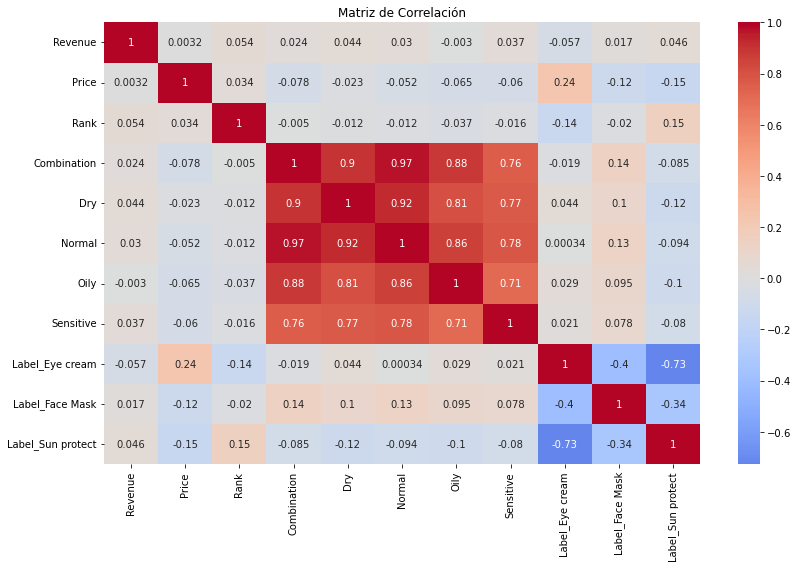

In [15]:
# Columnas numéricas
columnas_numericas = new_df.select_dtypes(include=['number'])

# Nuevo datraframe con dichas columnas
new_df = columnas_numericas

# Crear la matriz de correlacion con las variables numericas
correlation_matrix = new_df.corr()

# Crear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [16]:
# Ordenar las correlaciones por valor absoluto (de mayor a menor)
correlaciones_ordenadas = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filtrar las correlaciones que son más fuertes que un umbral (por ejemplo, 0.7)
correlaciones_fuertes = correlaciones_ordenadas[correlaciones_ordenadas > 0.7]


print("correlaciones_fuertes", correlaciones_fuertes)


correlaciones_fuertes Revenue            Revenue              1.000000
Price              Price                1.000000
Label_Face Mask    Label_Face Mask      1.000000
Label_Eye cream    Label_Eye cream      1.000000
Sensitive          Sensitive            1.000000
Oily               Oily                 1.000000
Dry                Dry                  1.000000
Combination        Combination          1.000000
Rank               Rank                 1.000000
Normal             Normal               1.000000
Label_Sun protect  Label_Sun protect    1.000000
Combination        Normal               0.970838
Normal             Combination          0.970838
Dry                Normal               0.923681
Normal             Dry                  0.923681
Combination        Dry                  0.904416
Dry                Combination          0.904416
Combination        Oily                 0.882958
Oily               Combination          0.882958
Normal             Oily                 0.86395

*EFECTOS CUADRATICOS*